In [1]:
# 图像分析与理解
# 图像配准实验 - Harris角点
# 东南大学，卓旭，212138

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from helper import display

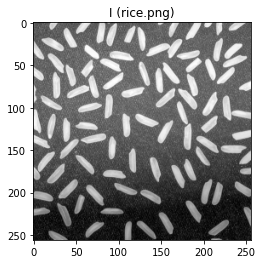

In [3]:
I = np.array(Image.open('rice.png'), dtype=np.uint8)
plt.figure()
display(I, 'I (rice.png)')

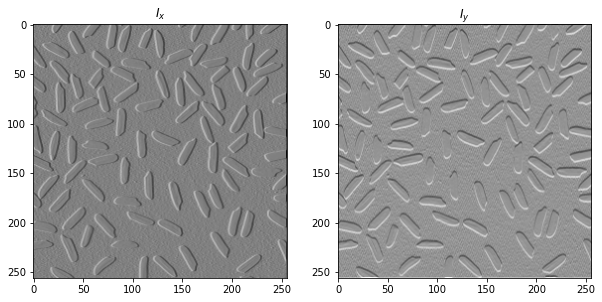

In [4]:
I = I.astype(np.float32)
Gx = np.array([
    [0, 0, 0],
    [-1, 0, 1],
    [0, 0, 0]
], dtype=np.float32) / 2
Gy = np.array([
    [0, 1, 0],
    [0, 0, 0],
    [0, -1, 0]
], dtype=np.float32) / 2
Ix = cv2.filter2D(I, -1, Gx, borderType=cv2.BORDER_CONSTANT)
Iy = cv2.filter2D(I, -1, Gy, borderType=cv2.BORDER_CONSTANT)
plt.figure(figsize=(10, 6))
plt.subplot(121); display(Ix, r'$I_x$')
plt.subplot(122); display(Iy, r'$I_y$')
plt.show()

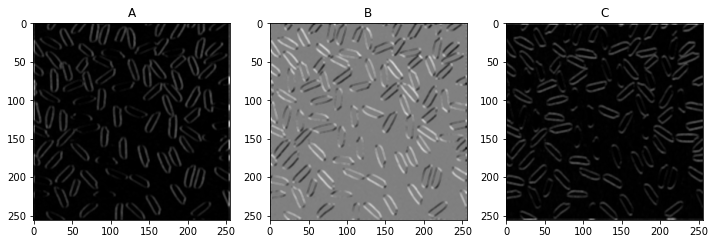

In [5]:
S = np.ones((3, 3))
Ixx = Ix ** 2; Ixy = Ix * Iy; Iyy = Iy ** 2
IxxSum = cv2.filter2D(Ixx, -1, S, borderType=cv2.BORDER_CONSTANT)
IxySum = cv2.filter2D(Ixy, -1, S, borderType=cv2.BORDER_CONSTANT)
IyySum = cv2.filter2D(Iyy, -1, S, borderType=cv2.BORDER_CONSTANT)
plt.figure(figsize=(12, 6))
plt.subplot(131); display(IxxSum, 'A')
plt.subplot(132); display(IxySum, 'B')
plt.subplot(133); display(IyySum, 'C')
plt.show()

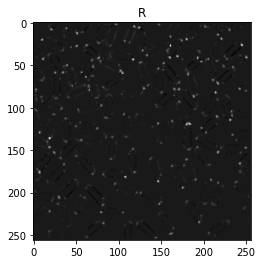

In [6]:
k = 0.02
R = ((IxxSum * IyySum) - (IxySum ** 2)) - k * ((IxxSum + IyySum) ** 2)
R[0:2, :] = R[-2:, :] = R[:, 0:2] = R[:, -2:] = 0
plt.figure()
display(R, 'R')
plt.show()

In [7]:
Rmax = np.max(R)
Rmax, 0.2 * Rmax

(41500812.0, 8300162.4)

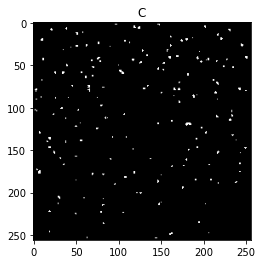

In [8]:
C = R.copy()
C[C <= 0.2 * Rmax] = 0
C[C > 0] = 1
plt.figure()
display(C, 'C')
plt.show()

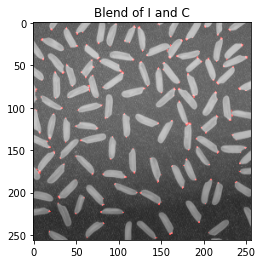

In [9]:
blend = np.array([np.clip(I + C * 255, 0, 255), I, I]).astype(np.uint8)
plt.figure()
display(Image.fromarray(blend.transpose((1, 2, 0)), mode='RGB'), 'Blend of I and C')
plt.show()

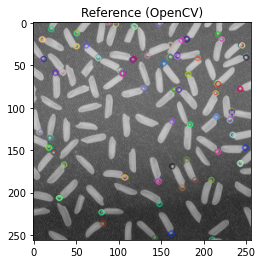

In [10]:
refHarris = cv2.cornerHarris(I, 3, 3, 0.02)
keypoints = []
refHarris = cv2.normalize(refHarris, None, 0, 255, cv2.NORM_MINMAX)
for r in range(refHarris.shape[0]):
    for c in range(refHarris.shape[1]):
        if refHarris[r, c] >= 255 // 2:
            p = cv2.KeyPoint(); p.pt = (c, r)
            keypoints.append(p)
refMarked = cv2.drawKeypoints(I.astype(np.uint8), keypoints, None)
plt.figure()
display(refMarked, 'Reference (OpenCV)')
plt.show()